# Linear Regression in sklearn

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy

In [2]:
seaborn.set(rc = {"figure.figsize":(10,8)})
seaborn.set_style("darkgrid")

## Simple Linear Regression

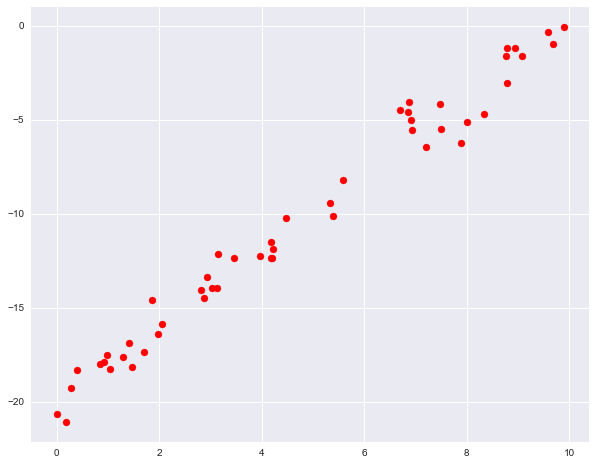

In [3]:
rng = numpy.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 20 + rng.randn(50) 
plt.scatter(x, y, color = "red")

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
model = LinearRegression(fit_intercept = True)

In [6]:
model.fit(x[:,numpy.newaxis], y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
xfit = numpy.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, numpy.newaxis])

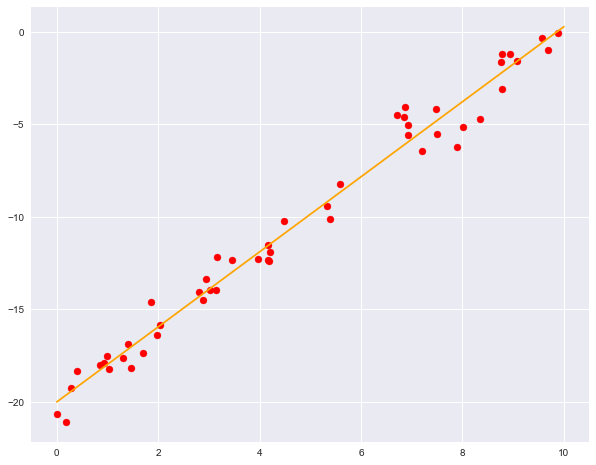

In [8]:
plt.scatter(x, y, color = "red")
plt.plot(xfit, yfit, color = "orange" )

In [9]:
model.intercept_

-19.998577085553205

In [10]:
model.coef_

array([2.02720881])

## Polynomial Basis Functions

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [12]:
x = numpy.array([2,5,6])

In [13]:
poly = PolynomialFeatures(3, include_bias = False)
poly.fit_transform(x[:, None])

array([[  2.,   4.,   8.],
       [  5.,  25., 125.],
       [  6.,  36., 216.]])

In [14]:
from sklearn.pipeline import make_pipeline

In [15]:
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

In [16]:
rng = numpy.random.RandomState(1)

In [17]:
x = 10 * rng.rand(50)
y = numpy.sin(x) + 0.1 * rng.randn(50)

In [18]:
xfit = numpy.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, numpy.newaxis])

In [19]:
poly_model.fit(x[:, numpy.newaxis], y)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=7, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [20]:
yfit = poly_model.predict(xfit[:, numpy.newaxis])

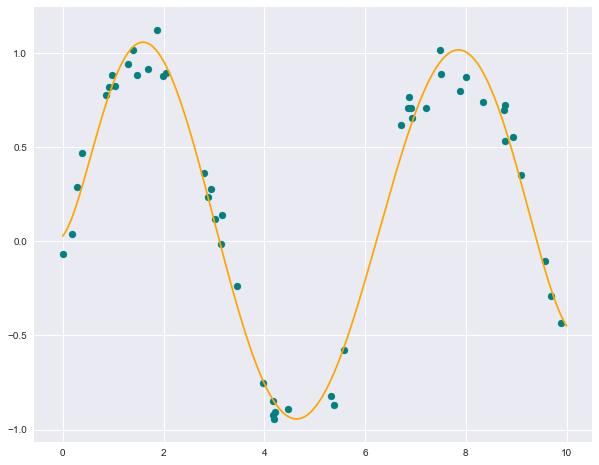

In [21]:
plt.plot(xfit, yfit, color = "orange")
plt.scatter(x, y, color = "teal")

### Tests

In [22]:
frog = rng.randn(150) * numpy.random.randint(1,5)

In [23]:
toad = numpy.cos(frog)
cricket = numpy.sin(frog)

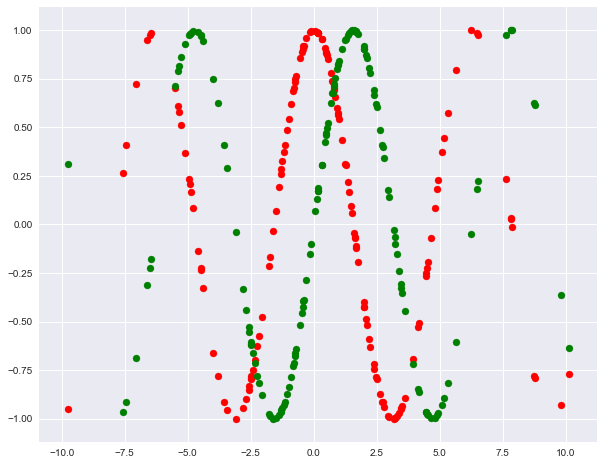

In [24]:
plt.scatter(frog, toad, color = "red")
plt.scatter(frog, cricket, color = "green")